In [ ]:
#Nama     : Nabilah Salwa
#NIM      : 1103204060
#Dataset  : Diabetes Dataset (https://www.kaggle.com/code/merterendagistan/feature-engineering-diabets-dataset/notebook)
#Model    : Classification menggunakan metode XGBoots

In [1]:
# Import library pandas untuk manipulasi data
import pandas as pd
# Import library numpy untuk operasi numerik
import numpy as np
# Import library matplotlib.pyplot untuk visualisasi data
import matplotlib.pyplot as plt
# Import library seaborn untuk visualisasi data yang lebih bagus
import seaborn as sns
# Import library scikit-learn untuk pemodelan dan evaluasi
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error
# Import library XGBoost untuk pemodelan klasifikasi
import xgboost as xgb

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Baca dataset menggunakan Pandas dengan path sesuai dataset di Google Drive
data = pd.read_csv("/content/drive/MyDrive/Dataset/diabetes.csv")

Mounted at /content/drive


EDA (Exploratory Data Analysis) adalah suatu pendekatan dalam analisis data yang bertujuan untuk meringkas dan memahami karakteristik utama dari suatu dataset. EDA dilakukan dengan menggunakan teknik statistik dan visualisasi data untuk mengidentifikasi pola, hubungan, anomali, dan tren dalam data

In [ ]:
# Menampilkan baris pertama dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Info dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


1. Diabetes Dataset memiliki 768 baris data
2. Terdapat 9 kolom yaitu : Pregnancies, Glucose, BloodPressure, SkinThicness, Insulin, BMI, DiabetesPedigreeFunction, Age, dan Outcome
3. Semua baris pada 9 kolom tersebut tidak memiliki null
4. Tipe data integer terdapat pada kolom Pregnancies, Glucose, BloodPressure, SkinThicness, Insulin, Age, dan Outcome
5. Tipe data float terdapat pada kolom BMI dan DiabetesPedigreeFunction

Visualisasi EDA (Exploratory Data Analysis) adalah representasi grafis dari data yang digunakan untuk membantu pemahaman karakteristik dan pola dalam dataset. Visualisasi EDA bertujuan untuk memberikan wawasan visual yang dapat membantu peneliti atau analis dalam mengeksplorasi data, mengidentifikasi pola, hubungan, dan tren, serta memahami distribusi variabel.

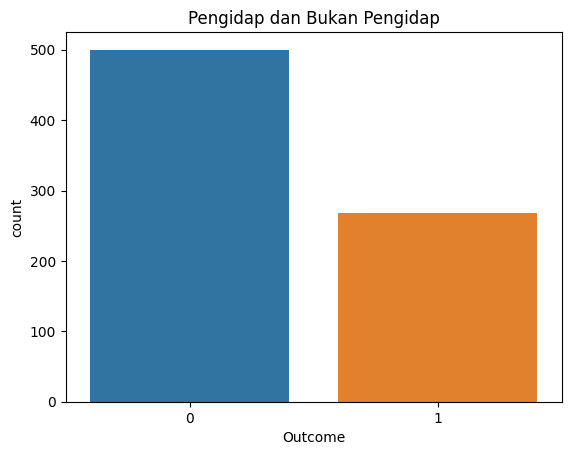

In [ ]:
# Visualisasi EDA
sns.countplot(x='Outcome', data=data)
plt.title('Pengidap dan Bukan Pengidap')
plt.show()

In [ ]:
# Mengisi nilai yang hilang dengan metode forward fill
data.fillna(method='ffill', inplace=True)

In [ ]:
# Handle kolom kategorikal
data = pd.get_dummies(data, columns=['Age', 'Insulin', 'BloodPressure', 'SkinThickness', 'BMI'], drop_first=True)

# Melihat data yang telah diperbarui
print(data.head())

   Pregnancies  Glucose  DiabetesPedigreeFunction  Outcome  Age_22  Age_23  \
0            6      148                     0.627        1       0       0   
1            1       85                     0.351        0       0       0   
2            8      183                     0.672        1       0       0   
3            1       89                     0.167        0       0       0   
4            0      137                     2.288        1       0       0   

   Age_24  Age_25  Age_26  Age_27  ...  BMI_49.6  BMI_49.7  BMI_50.0  \
0       0       0       0       0  ...         0         0         0   
1       0       0       0       0  ...         0         0         0   
2       0       0       0       0  ...         0         0         0   
3       0       0       0       0  ...         0         0         0   
4       0       0       0       0  ...         0         0         0   

   BMI_52.3  BMI_52.9  BMI_53.2  BMI_55.0  BMI_57.3  BMI_59.4  BMI_67.1  
0         0         0   

Training data adalah data yang digunakan untuk melatih (mengajar) model dalam proses pembelajaran mesin (machine learning). Pada umumnya, dataset dibagi menjadi dua bagian utama: training set (data latih) dan test set (data uji). Training set digunakan untuk melatih model, sedangkan test set digunakan untuk menguji performa model pada data yang belum pernah dilihat sebelumnya.

In [ ]:
# Pisahkan fitur dan label
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Memisahkan dataset menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inisialisasi model XGBoost
model = xgb.XGBClassifier()

# Melatih model pada data training
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Evaluating data adalah proses penilaian dan analisis terhadap dataset untuk memahami karakteristik, kualitas, dan struktur datanya. Evaluasi data bertujuan untuk mendapatkan wawasan yang mendalam tentang informasi yang terkandung dalam dataset dan mempersiapkan data tersebut untuk tahap selanjutnya, seperti pemodelan atau analisis.

In [ ]:
# Melakukan prediksi pada dataset
y_pred = model.predict(X_test)

# Evaluasi performa model menggunakan accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 71.43%


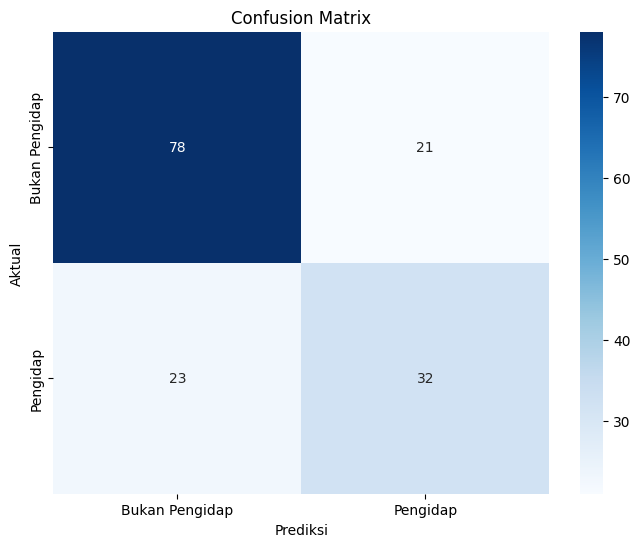

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bukan Pengidap', 'Pengidap'],
            yticklabels=['Bukan Pengidap', 'Pengidap'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [ ]:
# Menampilkan Classification report
print('Classification Report:')
# Menghasilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        99
           1       0.60      0.58      0.59        55

    accuracy                           0.71       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.71      0.71      0.71       154



Inputing data (penginputan data) adalah proses memasukkan atau memberikan data ke dalam suatu sistem atau program. Ini adalah langkah awal yang penting dalam pemrosesan data, karena data yang baik dan benar akan mempengaruhi kualitas analisis atau model yang dibangun.

In [ ]:
import pandas as pd

# Buat data dummy untuk prediksi
new_data = pd.DataFrame({
    'BloodPressure': [3],
    'SkinThickness': [25],
    'SInsulin': [1],
    'BMI': [0],
    'DiabetesPedigreeFunction': [10],
    'Age': [1],
    'Outcome': [0],
})

In [ ]:
# Input data untuk prediksi
input_data = X_train.iloc[[0]]

# Melakukan prediksi menggunakan model yang telah dilatih
prediction = model.predict(input_data)

# Menampilkan hasil prediksi
print(f'Prediction for input data: {prediction[0]}')

Prediction for input data: 0
